# Importing the libraries

TODO: What about the duplicate rows? Should we remove them?
TODO: Should we use a specific random_state?
TODO: Should we use a scaler?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
random_state = 42


# Importing the dataset, preprocessing and analyzing it

## Importing the dataset

In [3]:
COVID_19_outcome_dataset = pd.read_csv("datasets/COVID-19-outcome.csv")


Let's view the shape of the dataset.

In [4]:
COVID_19_outcome_dataset.shape


(863, 15)

As described inside the project description, we have 14 features but as shown above, the shape of the dataset is (863, 15). Let's view the first 5 rows of the dataset.

In [5]:
COVID_19_outcome_dataset.head()


,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


As shown above there is an extra column called "Unnamed: 0" which contains the index of each row. Let's drop this column.

Note: Pandas named this column as it doesn't have a name.

In [6]:
COVID_19_outcome_dataset.drop(["Unnamed: 0"], axis=1, inplace=True)


Now let's view the shape again.

In [7]:
COVID_19_outcome_dataset.shape


(863, 14)

Much better!!!

Now let's view some information about the dataset.

In [8]:
COVID_19_outcome_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


Let's check if there are any missing values.

In [9]:
COVID_19_outcome_dataset.isna().sum()


location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

Now Let's find out if there are any duplicate rows.

In [10]:
duplicates_count = 0
for x in COVID_19_outcome_dataset.duplicated():
    if x == True:
        duplicates_count += 1

print("Duplicates : ", duplicates_count)


Duplicates :  168


We have 168 rows that are duplicates. Let's drop them.

In [11]:
# index = 0
# for x in COVID_19_outcome_dataset.duplicated():
#     if (x == True):
#         COVID_19_outcome_dataset.drop([index], axis=0, inplace= True)
#     index+=1


Let's view the duplicate rows again to make sure they are dropped.


In [12]:
# duplicates_count = 0
# for x in COVID_19_outcome_dataset.duplicated():
#     if (x == True):
#         duplicates_count+=1

# print("Duplicates : ", duplicates_count)


Note that the `.duplicated()` method ignores (marks as False) the first occurence of the duplicated rows and marks the rest as True. For example:

```python
temp = [[1,4,1],
        [1,5,1],
        [3,6,0],
        [8,4,1],
        [1,4,1],
        [1,4,0],
        [3,6,0],
        [5,1,1],
        [9,4,0],
        [1,7,0]]
pd.DataFrame(temp).duplicated()
```

will return:

```
0    False
1    False
2    False
3    False
4     True --> This row is a duplicate of row 0.
5    False
6     True --> This row is a duplicate of row 2.
7    False
8    False
9    False
dtype: bool
```


In [13]:
COVID_19_outcome_dataset.describe()


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


## Let's work on the outliers

## Exploratory Data Analysis

### Visualizing Data Distributions

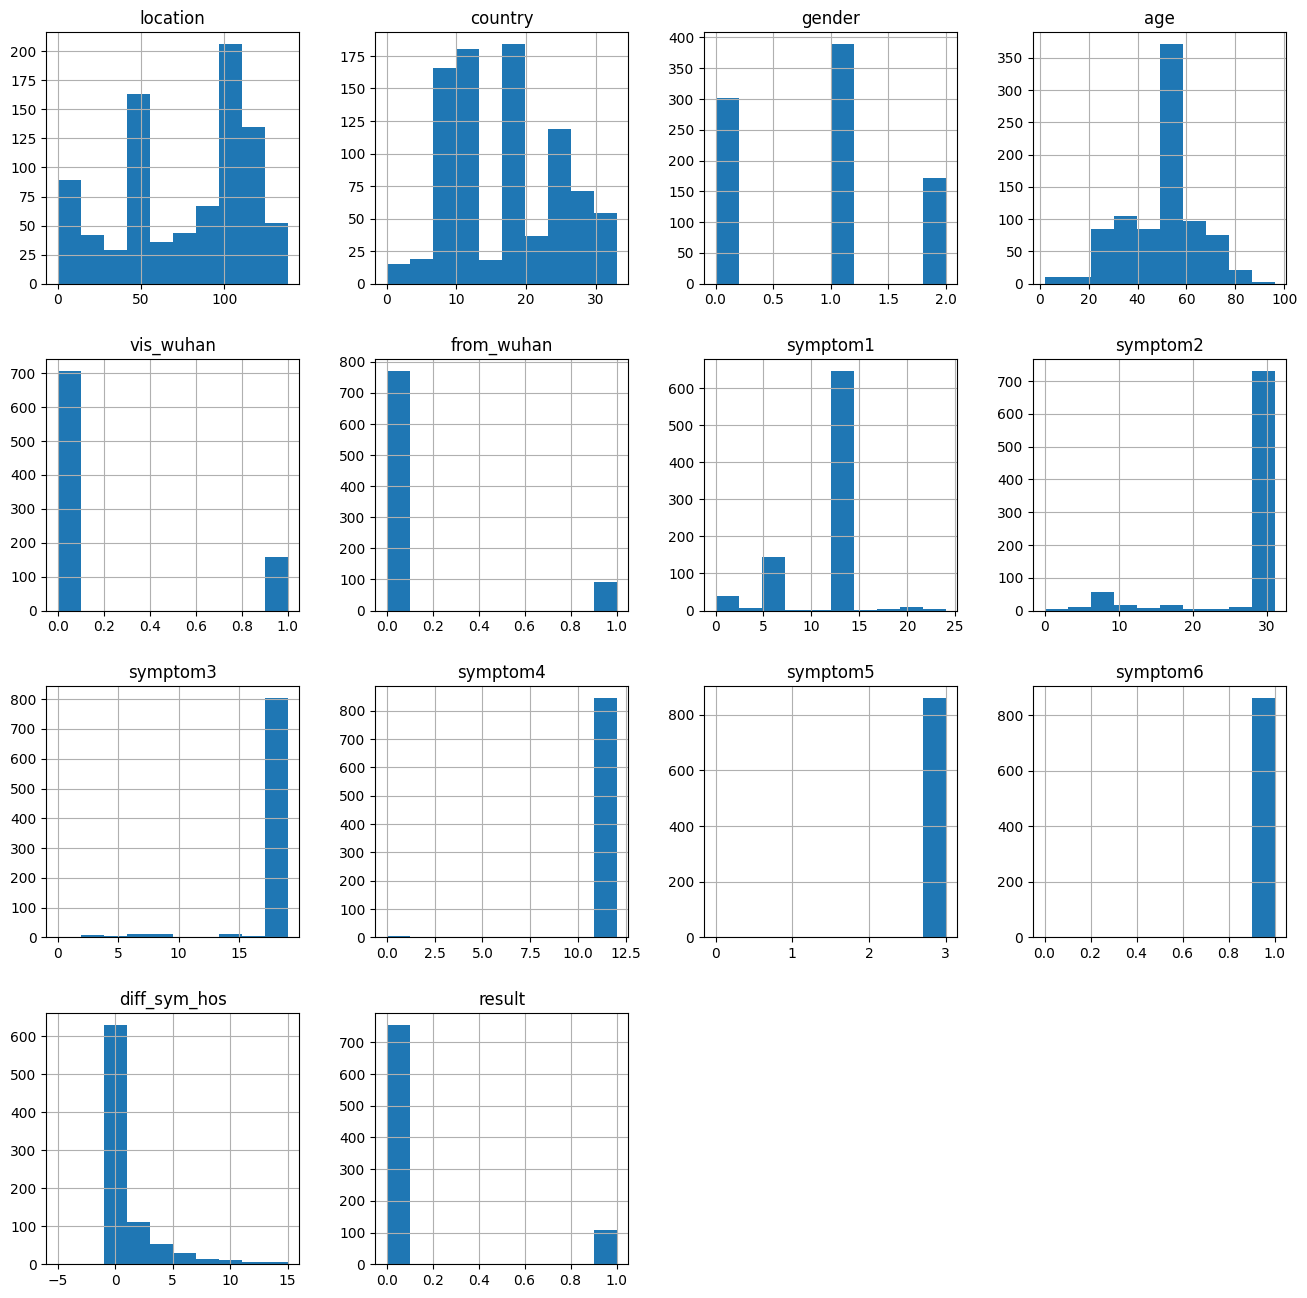

In [14]:
COVID_19_outcome_dataset.hist(figsize=(16, 16))
plt.show()


### Visualizing feature correlations

This is the covariance matrix

```
      0           1           2           ...  n
    -------------------------------------------------------
0   | Var(0)      Covar(0,1)  Covar(0,2)  ...  Covar(0,n) |
    -------------------------------------------------------
1   | Covar(1,0)  Var(1)      Covar(1,2)  ...  Covar(1,n) |
    -------------------------------------------------------
2   | Covar(2,0)  Covar(2,1)  Var(2)      ...  Covar(2,n) |
    -------------------------------------------------------
... | ...         ...         ...         ...  ...        |
    -------------------------------------------------------
n   | Covar(n,0)  Covar(n,1)  Covar(n,2)  ...  Var(n)     |
    -------------------------------------------------------
```

So for example:

${covariance}(X, Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$

The mean of variable $X$ is calculated as $\bar{X} = \frac{\sum_{i=1}^{n} X_i}{n}$, and the mean of variable $Y$ is calculated as $\bar{Y} = \frac{\sum_{i=1}^{n} Y_i}{n}$.

Let's calculate the `covariance(location,location)` OR `covariance(0,0)` OR `variance(location)` OR `variance(0)` and the `covariance(location,country)` OR `covariance(0,1)` to make sure that the covariance matrix is correct.

```python

# Calculating the covariance(location,location) OR covariance(0,0) OR variance(location) OR variance(0)

n = COVID_19_outcome_dataset.shape[0]

x1 = COVID_19_outcome_dataset.iloc[:,0].values
y1 = x1

x1bar = np.mean(x1)
y1bar = x1bar

v_x1 = np.sum((x1 - x1bar) ** 2)
v_y1 = np.sum((y1 - y1bar) ** 2)

cov1_numerator = np.sum((x1 - x1bar) * (y1 - y1bar))
cov1 = cov1_numerator / ( n - 1)

correlation1_coefficient = cov1_numerator / (np.sqrt(v_x1) * np.sqrt(v_y1))

correlation1_coefficient

```

Will return:

```
1.0000000000000002
```

```python

# Calculating the covariance(location,country) OR covariance(0,1)

n = COVID_19_outcome_dataset.shape[0]

x2 = COVID_19_outcome_dataset.iloc[:,0].values
y2 = COVID_19_outcome_dataset.iloc[:,1].values

x2bar = np.mean(x2)
y2bar = np.mean(y2)

v_x2 = np.sum((x2 - x2bar) ** 2)
v_y2 = np.sum((y2 - y2bar) ** 2)

cov2_numerator = np.sum((x2 - x2bar) * (y2 - y2bar))
cov2 = cov2_numerator / (n - 1)

correlation2_coefficient = cov2_numerator / (np.sqrt(v_x2) * np.sqrt(v_y2))

correlation2_coefficient

```

Will return:

```
0.3093467486067619
```

Let's check the correlation matrix.

```python

corr = COVID_19_outcome_dataset.drop("result",axis= 1, inplace= False).corr()

corr["location"]["location"]

```

Will return:

```
1.0
```

```python

corr = COVID_19_outcome_dataset.drop("result",axis= 1, inplace= False).corr()

corr["location"]["country"]

```

Will return:

```
0.30934674860676165
```



We drop the target column to view the correlations between the features BUT we set `inplace` to False so that the original dataset is not affected.

In [15]:
corr = COVID_19_outcome_dataset.drop("result", axis=1, inplace=False).corr()


#### Let's draw the heatmap.


Here we only show the high(>0.5) and low(<-0.5) corr graph.

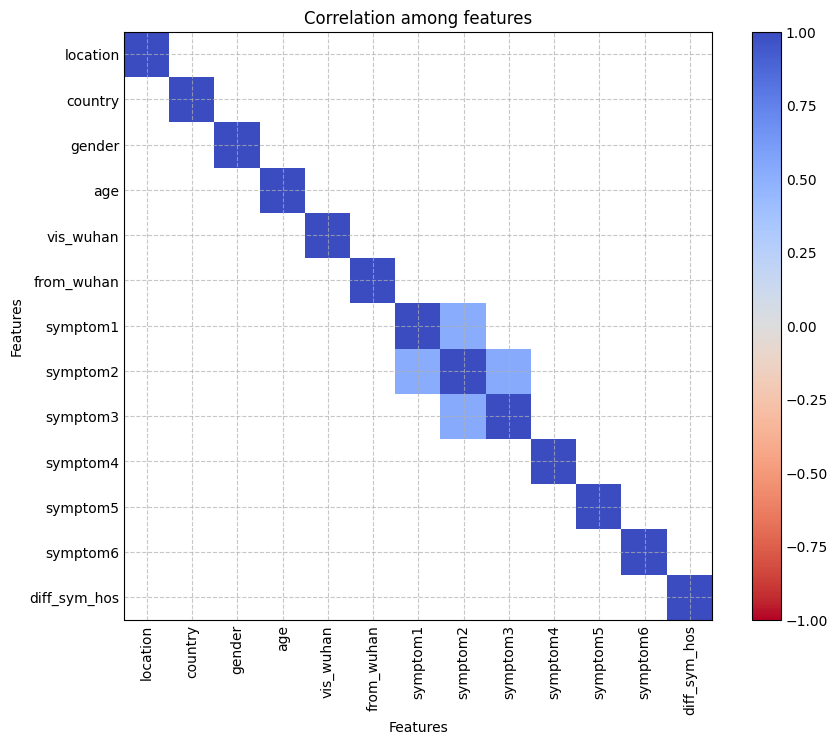

In [16]:
plt.style.use("_mpl-gallery-nogrid")

fig, ax = plt.subplots(figsize=(8, 6))
labels = COVID_19_outcome_dataset.columns.drop(
    "result"
)  # Column labels but remove the result (target) column.
features_count = COVID_19_outcome_dataset.shape[1]
filtered_corr = corr[(corr > 0.5) | (corr < -0.5)]
hm = ax.imshow(
    filtered_corr, cmap="coolwarm_r", interpolation="nearest", aspect="equal"
)
ax.set_xticks(
    np.arange(0, features_count - 1), labels=labels, rotation="vertical", ha="center"
)  # X-axis scale and labels
ax.set_yticks(
    np.arange(0, features_count - 1), labels=labels
)  # Y-axis scale and labels
ax.grid(visible=True, linestyle="--", alpha=0.7)
ax.set(title="Correlation among features", xlabel="Features", ylabel="Features")
hm.set_clim((-1, 1))
cbar = fig.colorbar(mappable=hm)  # This is the color bar at the right
plt.show()


From the above heatmap, we observe that `symptom1` and `symptom2` are slightly correlated. Same with `symptom2` and `symptom3`.

# Model Building

## Splitting the dataset into the Training set and Test set

In [17]:
X = COVID_19_outcome_dataset.drop("result", axis=1, inplace=False).values
Y = COVID_19_outcome_dataset["result"].values


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=random_state
)
for n, d in [
    ("X_train", X_train),
    ("X_test", X_test),
    ("Y_train", Y_train),
    ("Y_test", Y_test),
]:
    print(f"{n} Shape= {d.shape}")


X_train Shape= (690, 13)
X_test Shape= (173, 13)
Y_train Shape= (690,)
Y_test Shape= (173,)


## Scaling Data

This StandardScaler will scale the data to be inside the range of -3 and 3 inclusive.

In [19]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)


array([[-0.82848612, -0.50783513,  0.2169658 , ...,  0.05286641,
         0.        ,  2.69412875],
       [-1.66769734, -0.63507052,  0.2169658 , ...,  0.05286641,
         0.        , -0.43391016],
       [ 0.5447686 , -1.14401205, -1.15648744, ...,  0.05286641,
         0.        , -0.43391016],
       ...,
       [ 1.00252017,  0.12834178,  0.2169658 , ...,  0.05286641,
         0.        , -0.43391016],
       [-1.43882155,  1.01898945,  0.2169658 , ...,  0.05286641,
         0.        , -0.43391016],
       [-1.64226669, -1.14401205,  0.2169658 , ...,  0.05286641,
         0.        ,  2.24726605]])

## Model Training and Prediction
 - K-Nearest Neighbors (KNN)
 - Logistic Regression (LR)
 - Naïve Bayes (NB)
 - Decision Trees (DT)
 - Support Vector Machines (SVM)
### We test these models and evaluate the predictive performance of each model.  

In [20]:
models = {
    "KNN": KNeighborsClassifier(),
    "LR": LogisticRegression(),
    "NB": GaussianNB(),
    "DT": DecisionTreeClassifier(),
    "SVM": SVC(),
}


In [21]:
# KNNModel= models["KNN"].fit(X_train, Y_train)
# KNNPred= KNNModel.predict(X_test)
# LRModel= models["LR"].fit(X_train, Y_train)
# LRPred= LRModel.predict(X_test)
# NBModel= models["NB"].fit(X_train, Y_train)
# NBPred= NBModel.predict(X_test)
# DTModel= models["DT"].fit(X_train, Y_train)
# DTPred= DTModel.predict(X_test)
# SVMModel= models["SVM"].fit(X_train, Y_train)
# SVMPred= SVMModel.predict(X_test)
prediction = {}
for model_name, model in models.items():
    fitted_model = model.fit(X_train, Y_train)
    prediction[model_name] = fitted_model.predict(X_test)
    print(f"{model_name}: { round(model.score(X_test, Y_test),4)*100} %")
    print(classification_report(prediction[model_name], Y_test))


KNN: 92.49000000000001 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       147
           1       0.76      0.73      0.75        26

    accuracy                           0.92       173
   macro avg       0.86      0.84      0.85       173
weighted avg       0.92      0.92      0.92       173

LR: 94.8 %
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       155
           1       0.68      0.94      0.79        18

    accuracy                           0.95       173
   macro avg       0.84      0.95      0.88       173
weighted avg       0.96      0.95      0.95       173

NB: 61.85000000000001 %
              precision    recall  f1-score   support

           0       0.57      0.98      0.72        86
           1       0.92      0.26      0.41        87

    accuracy                           0.62       173
   macro avg       0.74      0.62      0.56       173
weighted avg  

## Let's check the Confusion Matrix of these outputs.

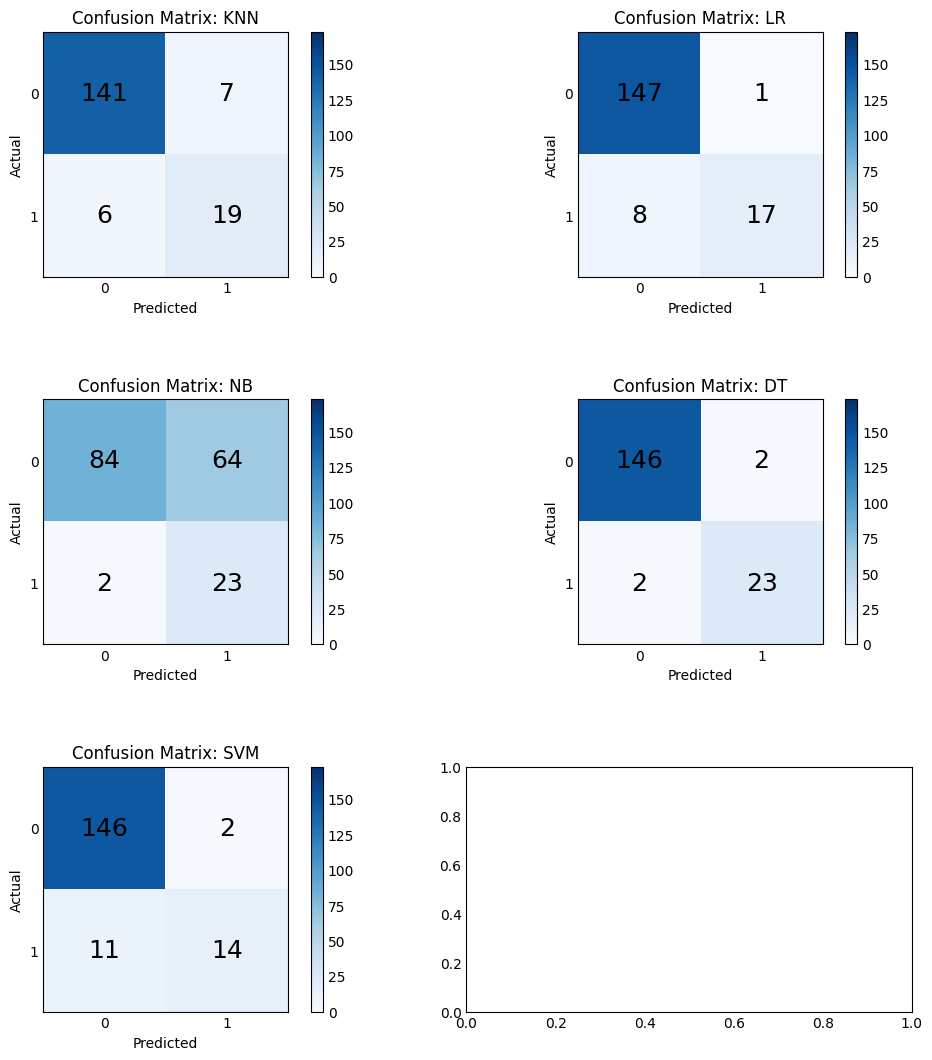

In [37]:
plt.style.use("_mpl-gallery-nogrid")

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, ((model_name, predicted_labels), ax) in enumerate(zip(prediction.items(), axes.flatten())):
    cm = confusion_matrix(Y_test, predicted_labels)
    hm = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    classes = np.unique(Y_test)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, labels=classes)  # X-axis scale and labels
    ax.set_yticks(tick_marks, labels=classes)  # Y-axis scale and labels
    ax.set(title=f"Confusion Matrix: {model_name}", xlabel="Predicted", ylabel="Actual")
    hm.set_clim((0, len(Y_test)))
    cbar = fig.colorbar(mappable=hm)  # This is the color bar at the right

    # Display the values in each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", size=18)

plt.show()
